### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns

### Read dataset

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)

In [7]:
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [8]:
df1 = pd.concat([df,Gender],axis=1)

In [9]:
df1.drop('Gender',axis=True,inplace=True)

In [10]:
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


## Check correlation between all coulmns of dataset

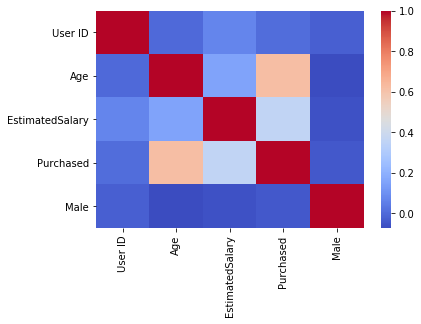

In [11]:
sns.heatmap(df1.corr(),cmap='coolwarm')

In [12]:
df1.drop(['User ID','Male'],inplace=True,axis=True)

In [13]:
df1.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Standardize the Variables
Because the Decision tree classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the decision tree classifier, than variables that are on a small scale.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
scaled_array=sc.fit_transform(df1.drop('Purchased',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
scaled_array

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [18]:
x=pd.DataFrame(data=scaled_array,columns=df1.columns[:-1])

In [19]:
y=df1['Purchased']

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Using decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model=DecisionTreeClassifier()

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluations

In [25]:
ypred=model.predict(x_test)

In [26]:
ypred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm=confusion_matrix(ypred,y_test)

In [29]:
cm

array([[68,  7],
       [ 7, 38]], dtype=int64)

In [30]:
accuracy=(71+32)/(71+32+10+7)

In [31]:
accuracy

0.8583333333333333

In [32]:
(71+32+10+7)

120

Decision Tree doesn't predict accurate as it does not removes outliers which affect accuracy of model

## Using random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

## Predictions and Evaluation

In [34]:
model1=RandomForestClassifier(n_estimators=60)

In [35]:
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
ypredict=model1.predict(x_test)

In [37]:
cm1=confusion_matrix(ypred,y_test)

In [38]:
cm1

array([[68,  7],
       [ 7, 38]], dtype=int64)

In [39]:
accuracy1=(66+38)/(66+38+10+6)

In [40]:
accuracy1

0.8666666666666667

#### So Random Forest achieve better accuracy than Decision Tree